In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

# 1. Get dataset

Using FashioMNIST dataset which has pictures of a wide variety of clothing

In [ ]:
train_data = datasets.FashionMNIST(
    root="data",# where to download data to
    train=True,# do we want training or testing data
    download=True, # do we want to download
    transform=ToTensor(),#chow do we want to transform data -> to tensors
    target_transform=None # how do we want to tranform labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform = None
)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx # gives index

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
image.shape, label # label index = 9 -> ankle boot
# color channel = 1 (only 2 possible -> 0 and 1 for black and white)
# height, width = 28

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, '9')

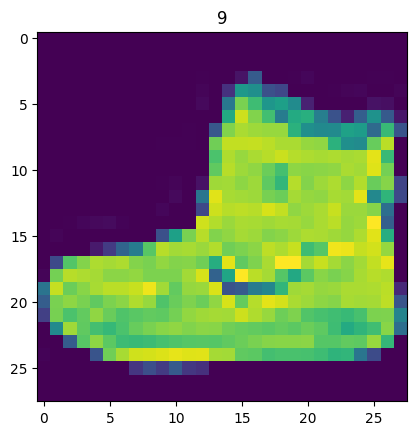

In [ ]:
# Visualise data
plt.imshow(image.squeeze())
plt.title(label)

(-0.5, 27.5, 27.5, -0.5)

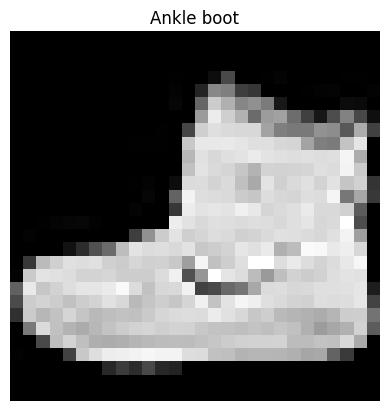

In [ ]:
# Plotting on gray scale
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

37542
46067
46876
46414
10026
27335
38620
11924
14950
57113
31378
29014
47210
18954
18231
47572


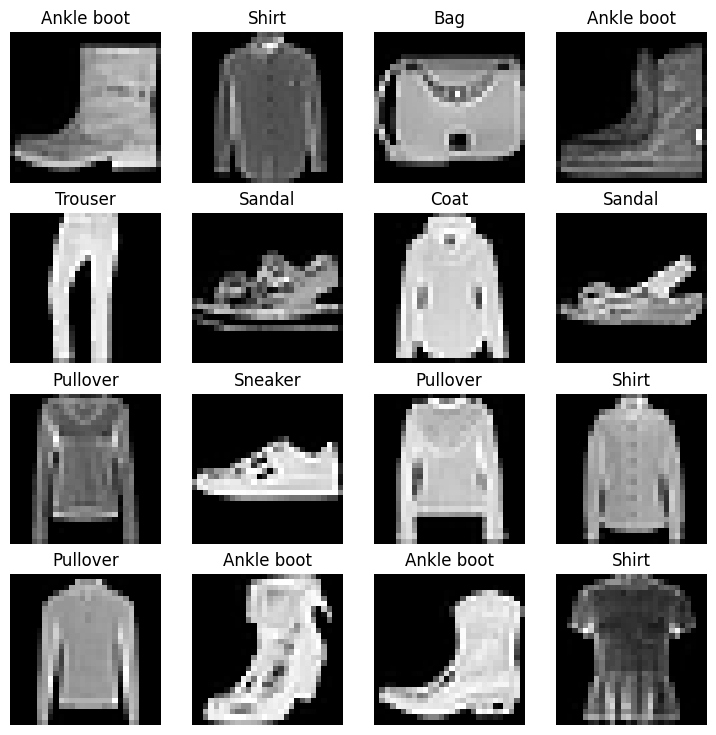

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  print(random_idx)
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

# 2. Prepare dataloader

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=32,
    shuffle=True # remove order
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=32,
    shuffle=False # dont shuffle for better eval
)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x796b7a742010>,
 <torch.utils.data.dataloader.DataLoader at 0x796b7a8f8110>)

In [ ]:
# Check whats inside training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image shape: torch.Size([1, 28, 28]),
 label: 8, label size: torch.Size([])


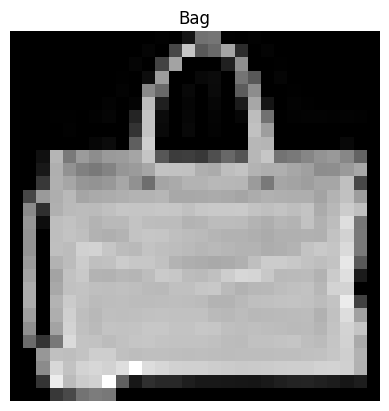

In [ ]:
# Show a sample

random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

print(f"image shape: {img.shape},\n label: {label}, label size: {label.shape}")



# 3. Build a Baseline Model

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # will perform forward pass

# what happened
print(f"shape before flattening: {x.shape} --> [color_channel, height, width]")
print(f"shape after flattening: {output.shape} --> [color_channel, height*width]")



shape before flattening: torch.Size([1, 28, 28]) --> [color_channel, height, width]
shape after flattening: torch.Size([1, 784]) --> [color_channel, height*width]


In [ ]:
# Make the model

class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)





In [ ]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(
    input_shape = 784,
    hidden_units = 10,
    output_shape = len(class_names)
)

model_0


FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
# Test on dummy_x

dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)


tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [ ]:
# Create loss
loss_fn = nn.CrossEntropyLoss() # multiclass

# Create optimiser
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
# Create function to time our experiments
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time

# 4. Train the model

* loop through epochs
* loop through training batches, perform training steps, calculate train loss *per batch*
* print whats happeining
* loop through testing batches, perform testing steps, calculate testing loss *per batch*
* time it all

In [ ]:
from tqdm.auto import tqdm # gives progress bar

torch.manual_seed(42)
train_start_time_model_0 = timer()

epochs = 3

# 1. loop through epochs
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  ### Training loop
  train_loss = 0

  # 2. loop through training batches
  for batch, (X,y) in enumerate(train_dataloader):
    # 3. Perform training steps
    model_0.train()

    # forward pass
    y_pred = model_0(X)
    # calculate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    # optimizer zero grad
    optimizer.zero_grad()
    # loss backward
    loss.backward()
    # optimizer step
    optimizer.step()

    if batch % 400 == 0:
      print(f"looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  # Divide total train loss by length of train dataloader
  train_loss /= len(train_dataloader)


  ### Testing loop
  test_loss = 0
  test_acc = 0
  model_0.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      test_pred = model_0(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss} | Test loss: {test_loss} | Test acc: {test_acc}")

train_end_time_model_0 = timer()

total_train_time_model_0 = train_end_time_model_0 - train_start_time_model_0
print(f"Total train time: {total_train_time_model_0}")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.5903892517089844 | Test loss: 0.5095350742340088 | Test acc: 82.03873801916933
Epoch: 1
---------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.4763319790363312 | Test loss: 0.47988998889923096 | Test acc: 83.19688498402556
Epoch: 2
---------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.4550333023071289 | Test loss: 0.47663894295692444 | Test acc: 83.42651757188499
Total train time: 33.18520171299997


# 5. Make predictions and evaluate the model

In [ ]:
# Make predictions
model_0.eval()
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  # should return a dictionary
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y, y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, # works only if model created with class
          "model_loss": loss.item(),
          "model_acc": acc}

model_0_results = eval_model(model=model_0,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# 6. Improve model by non-linearity

In [ ]:
# Build model with non-linear activation functions
from torch import nn

class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_shape),
        nn.ReLU()
    )


  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(
    input_shape = 784,
    hidden_units = 10,
    output_shape = len(class_names)
)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [ ]:
# Create loss
loss_fn = nn.CrossEntropyLoss() # multiclass

# Create optimiser
optimizer = torch.optim.SGD(model_1.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

In [ ]:
# Training function

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
  train_loss, train_acc = 0, 0

  for batch, (X,y) in enumerate(data_loader):
    model.train()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train loss: {train_loss} | Train acc: {train_acc}")


# Testing function

def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              optimizer: torch.optim.Optimizer,
              accuracy_fn):
  test_loss, test_acc = 0, 0

  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)

  print(f"Test loss: {test_loss} | Test acc: {test_acc}")


In [ ]:
from tqdm.auto import tqdm # gives progress bar

torch.manual_seed(42)
train_start_time_model_1 = timer()

epochs = 3

# 1. loop through epochs
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)

  test_step(model = model_1,
            data_loader = test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn)

train_end_time_model_1 = timer()

total_train_time_model_1 = train_end_time_model_1 - train_start_time_model_1
print(f"Total train time: {total_train_time_model_1}")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.0919920206069946 | Train acc: 61.343333333333334
Test loss: 0.9563649296760559 | Test acc: 64.99600638977635
Epoch: 1
---------
Train loss: 0.7810056805610657 | Train acc: 71.92833333333333
Test loss: 0.7222670316696167 | Test acc: 73.91174121405751
Epoch: 2
---------
Train loss: 0.6702709794044495 | Train acc: 75.93666666666667
Test loss: 0.6850009560585022 | Test acc: 75.01996805111821
Total train time: 31.509103488000164


# 7. Evaluate model with non-linearity

In [ ]:
# Make predictions
model_1.eval()
model_1_results = eval_model(model=model_1,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
model_0.eval()
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

# 8. Model 2 - Building a CNN

In [ ]:
# Building a CNN
from torch import nn

class FashionMNISTModelV2(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3, #
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3, #
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(x.shape)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x



In [ ]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape = 1,# no. of color channels
                              hidden_units = 10,
                              output_shape = len(class_names))

model_2

FashionMNISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# loss
loss_fn = nn.CrossEntropyLoss()

# optimiser
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
  acc = (correct / len(y_pred)) * 100
  return acc

# 9. Training CNN Model

In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_start_time_model_2 = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")

  train_step(model = model_2,
             data_loader = train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)

  test_step(model = model_2,
            data_loader = test_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            accuracy_fn=accuracy_fn)

train_end_time_model_2 = timer()

total_train_time_model_2 = train_end_time_model_2 - train_start_time_model_2
print(f"Total train time: {total_train_time_model_2}")


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.5951793193817139 | Train acc: 78.375
Test loss: 0.3950044810771942 | Test acc: 85.99241214057508
Epoch: 1
---------
Train loss: 0.3653560280799866 | Train acc: 86.90166666666667
Test loss: 0.35244327783584595 | Test acc: 86.91094249201278
Epoch: 2
---------
Train loss: 0.3258754312992096 | Train acc: 88.12833333333333
Test loss: 0.32718968391418457 | Test acc: 88.06908945686901
Total train time: 174.09110972400003


In [ ]:
# Make predictions
model_2.eval()
model_2_results = eval_model(model=model_2,
                             data_loader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn)
model_2_results


{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
# Comparing results
import pandas as pd
compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,33.185202
1,FashionMNISTModelV1,0.685001,75.019968,31.509103
2,FashionMNISTModelV2,0.327190,88.069089,174.091110


Text(0, 0.5, 'Model')

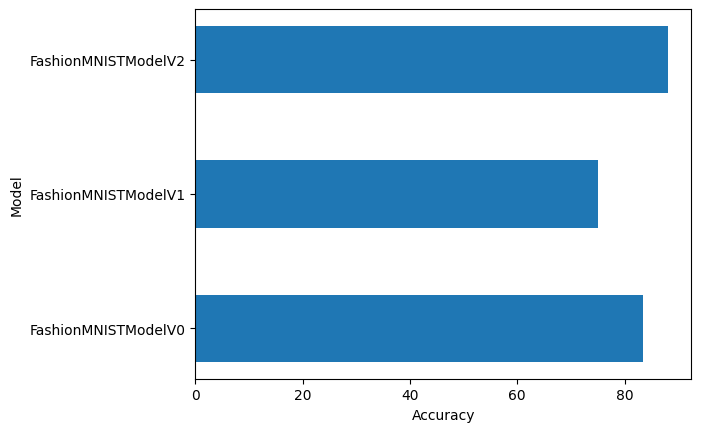

In [ ]:
# Visualise results
import matplotlib.pyplot as plt
plt.barh(compare_results['model_name'], compare_results['model_acc'], height = 0.5)
plt.xlabel("Accuracy")
plt.ylabel("Model")

# 10. Random predictions with CNN

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      # prep sample
      sample = torch.unsqueeze(sample, dim=0)

      # fwd pass
      pred_logit = model(sample)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
      pred_probs.append(pred_prob)

  return torch.stack(pred_probs)


In [ ]:
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Pullover')

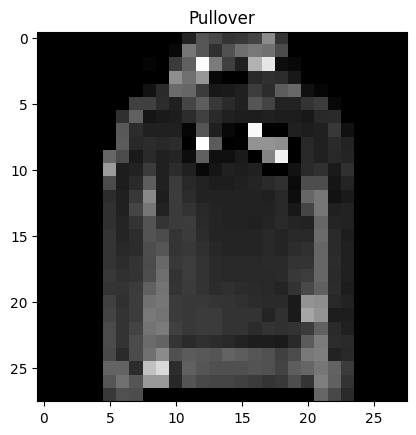

In [ ]:
plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(class_names[test_labels[0]])

In [ ]:
# Make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)
pred_probs[:2]

tensor([[4.9888e-02, 1.8706e-03, 5.7892e-01, 9.2597e-03, 1.9227e-01, 9.2515e-05,
         1.4721e-01, 1.8579e-04, 2.0143e-02, 1.5928e-04],
        [4.4751e-04, 5.4043e-05, 6.0747e-02, 4.6409e-04, 9.3198e-01, 6.9176e-07,
         3.2903e-03, 7.9197e-06, 2.9982e-03, 8.0210e-06]])

In [ ]:
# covert pred_probs to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes, test_labels #same

(tensor([2, 4, 6, 3, 2, 2, 0, 1, 1]), [2, 4, 6, 3, 2, 2, 0, 1, 1])

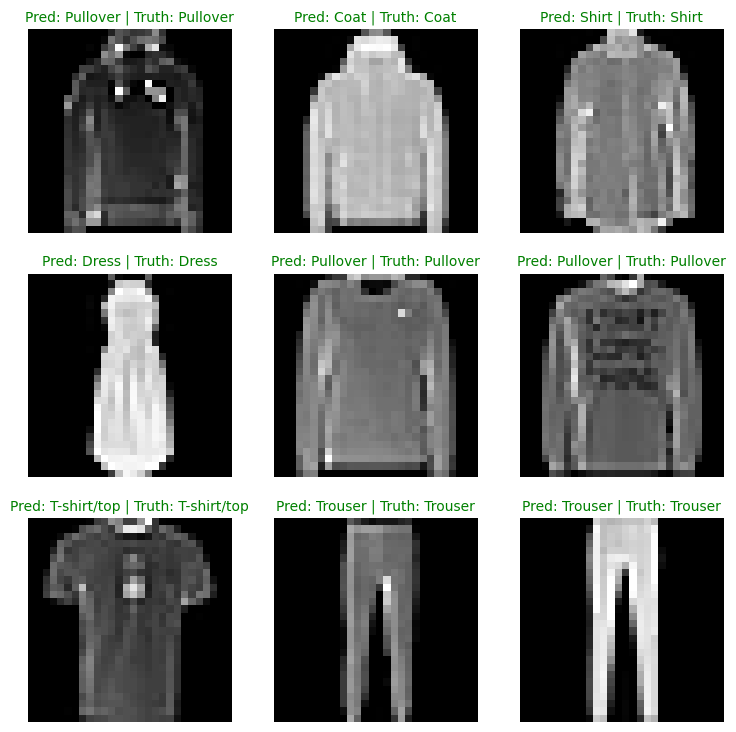

In [ ]:
# Plot predictions
plt.figure(figsize=(9,9))
nrows , ncols = 3,3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap='gray')
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, color='green')
  else:
    plt.title(title_text, fontsize=10, color='red')
  plt.axis(False)

  plt.axis(False)

# 11. Making Confusion Matrix

In [ ]:
from tqdm.auto import tqdm

y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader):
    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred)

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

  0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [ ]:
# install required packages
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 88.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.6 MB/s eta 0:00:00
mlxtend version: 0.23.4


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19

0.23.4


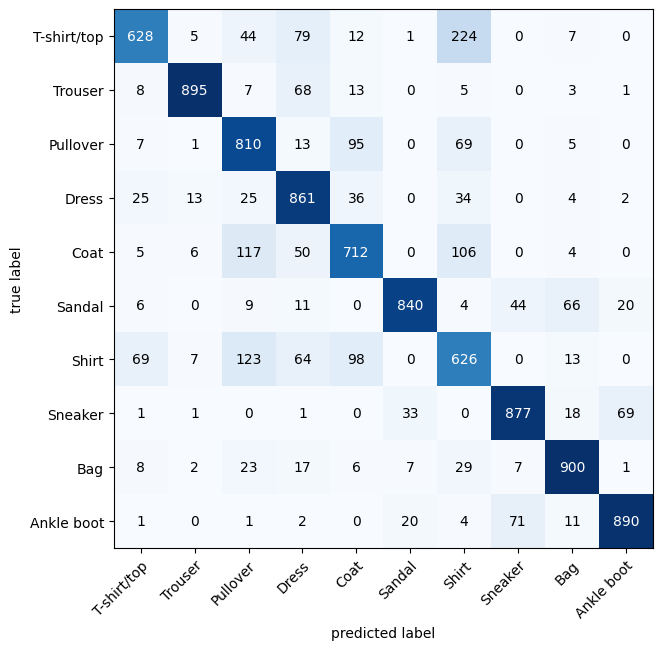

In [ ]:
# Plotting confusion Matrix
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task="multiclass")
confmat_tensor = confmat(preds=y_pred_tensor, target=test_data.targets)
confmat_tensor

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
)